#### Dans ce notebook nous allons nous focaliser les l'aspect nutritif des éléments du dataset d'openfoodfacts, notamment via le nutriscore et les différents nutriments présents dans les divers aliments. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 200)
sns.set(font_scale=1.5)

In [3]:
data = pd.read_csv("fr.openfoodfacts.org.products.csv", encoding = "utf-8",sep='\t')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Présentation des données 

In [4]:
data.head(20)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

#### On fait une carte de chaleur des valeurs manquantes, les elements en noir indiquent des valeurs préentes alors qu'une valeur blanche indique une valeur manquante.

<AxesSubplot:>

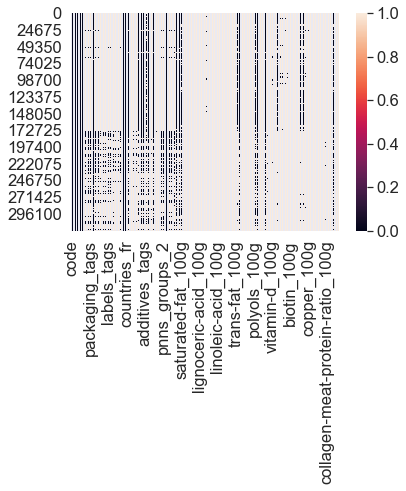

In [5]:
sns.heatmap(data.isna())

#### On ce rend compte qu'il y a énormément de valeurs manquantes, faisons maintenant un tour d'horizon du nombre de colonnes/lignes et essayons de voir si il y a des valeurs abérrantes 

In [6]:
data.isnull().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [7]:
data.shape

(320772, 162)

In [8]:
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

#### On s'aperçoit qu'il y a énormément de valeurs manquantes, beaucoup de valeurs abérantes (714grammes de graisse pour 100 grammes de produit par exemple) et beaucoup de colonnes qui vont être inutiles pour l'analyse que nous allons faire. 

# Traitement des données

### Filtrage des données utiles pour l'analyse

#### Comme on fait une analyse pour "Santé publique France" , on ne garde que les aliments français

In [9]:
data = data.loc[data["countries_fr"] == "France"]

#### On garde seulement les colonnes avec moins de 80% de valeurs manquantes afin de voir quelles données on pourra utiliser pour la suite

In [10]:
data = data[data.columns[data.isna().sum()/data.shape[0] <0.8]]

In [11]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",fr:filet-de-boeuf,Filet-de-boeuf,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Roissy,France",NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,5200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,NaN,1 kg,Sachet plastique,sachet-plastique,Bertrand Lejeune,bertrand-lejeune,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique",NaN,NaN,NaN,NaN,NaN,France,en:france,France,lentilles vertes,NaN,NaN,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...,NaN,NaN,0.0,0.0,NaN,Cereals and potatoes,Legumes,"en:to-be-completed, en:nutrition-facts-to-be-c...

#### On ne garde seulement que les colonnes qui nous intérésse pour faire une analyse nutritives des aliments via les nutriments

In [12]:
cols_to_keep=["product_name","main_category","nutrition_grade_fr",
              "fat_100g","carbohydrates_100g","proteins_100g","energy_100g",
              "sugars_100g","fiber_100g","salt_100g","sodium_100g","saturated-fat_100g",'nutrition-score-fr_100g'
               ]
data=data[cols_to_keep]

#### Nous avons la répartition suivante pour nos données

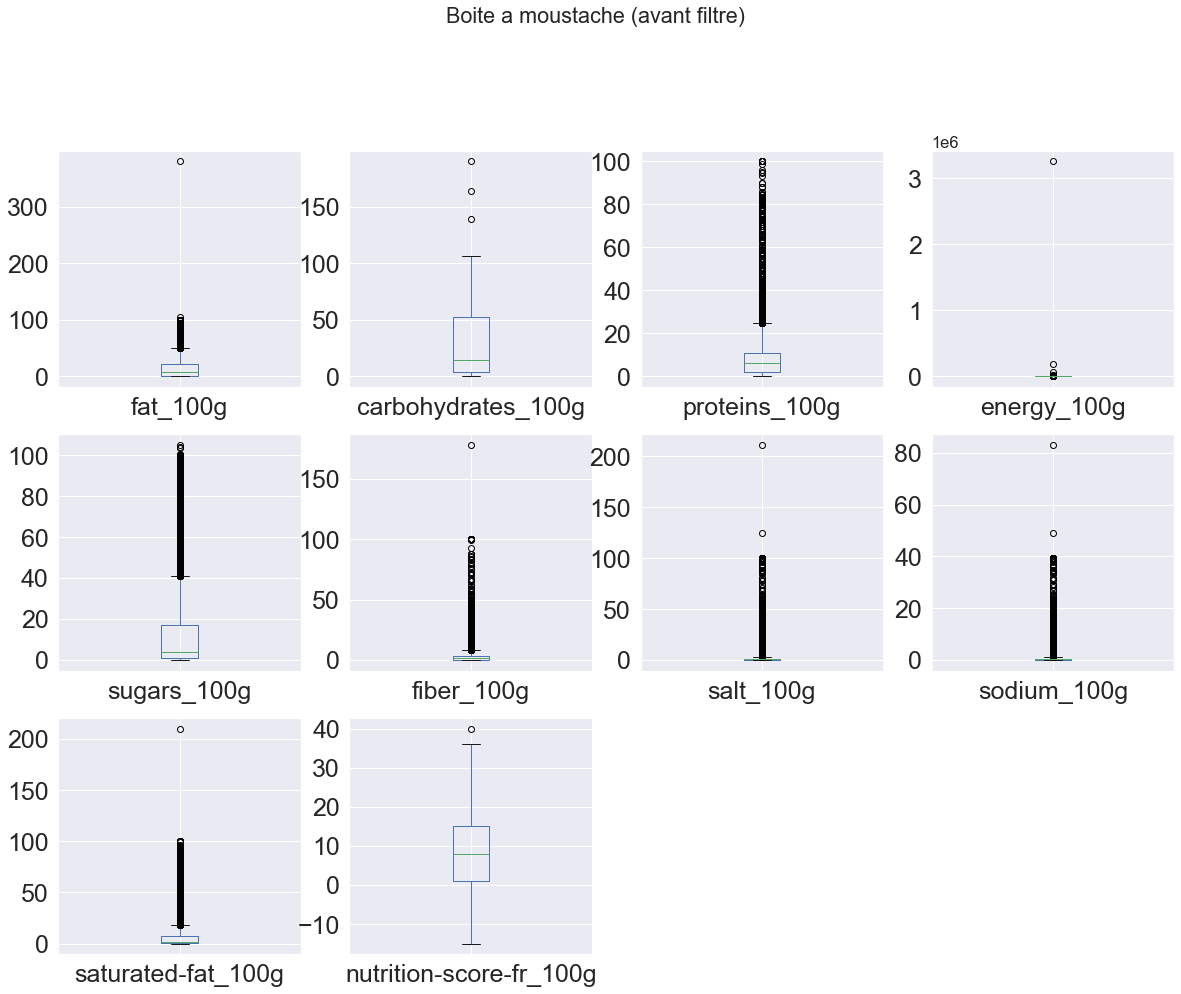

In [13]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title=('Boite a moustache (avant filtre) '),fontsize = 25, figsize=(20,20), layout=(4,4))
plt.show()

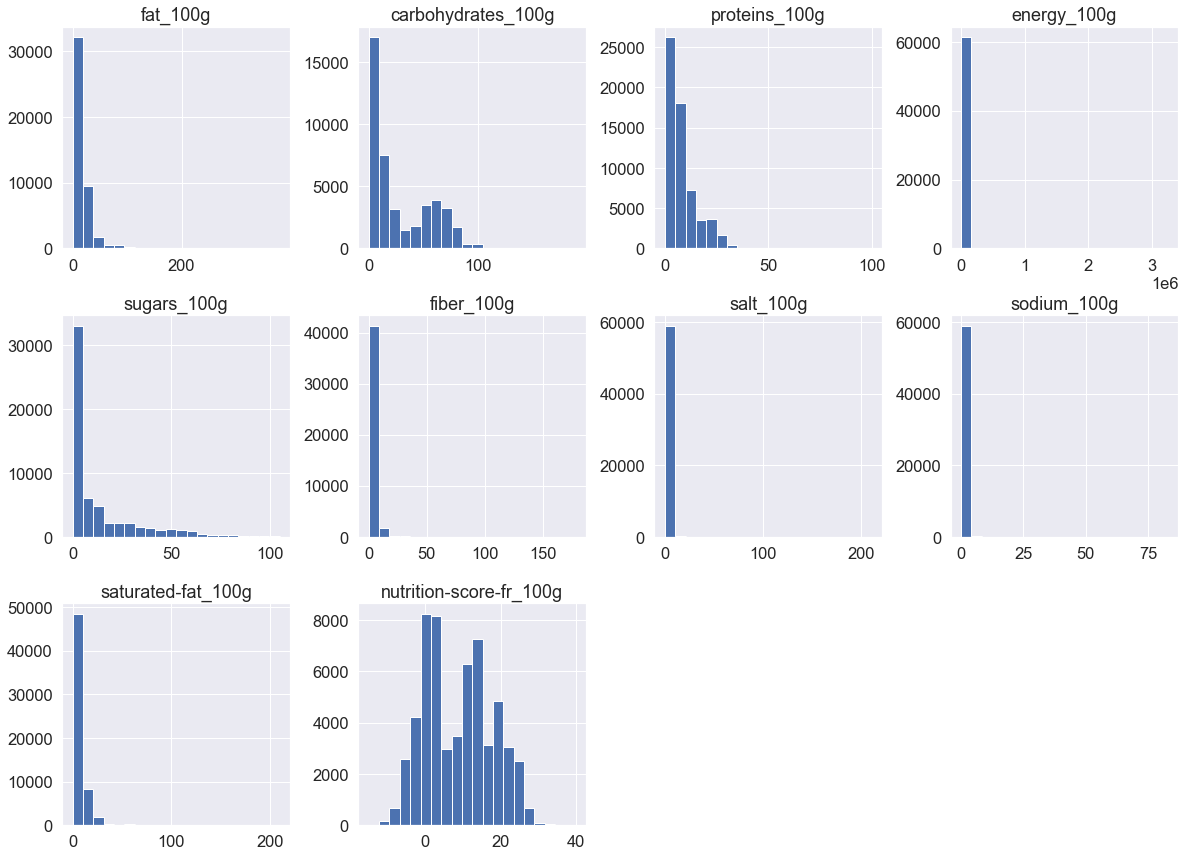

In [14]:
data.select_dtypes(include=float).hist(figsize=(20,20), layout=(4,4),bins=20)
plt.title("Histogramme (avant filtre)")

plt.show()

#### On ce rend compte qu'il y a beaucoup d'outliers(surtout sur les fibres, protéines et graisses), il va falloir filtrer les données avec des méthodes statistiques.
#### A noter qu'il est normal d'en avoir quelques uns étant donné la nature des éléments du dataset 

### Traitement des valeurs manquantes

#### on supprime toutes les valeurs manquantes, les colonnes que nous avons gardées contiennent sufisament de données pour être exploitées 

In [15]:
data = data.dropna(axis=0)

#### On supprime maintenant les valeurs doublons

In [16]:
data.duplicated().sum()

326

In [17]:
data.drop_duplicates(inplace=True)

## Filtrage des données

#### Filtrons maintenant nos données. 
#### On s'intéresse aux valeurs abérrantes dans un premier temps en supprimant les valeurs impossibles en prenant les valeurs maximales existantes 

In [18]:
data = data[(data['fat_100g']) <=100]            # => graisse pure
data = data[(data['carbohydrates_100g']) <=100]  # => fructose pure
data = data[(data['sugars_100g']) <=100]         # => sucre blanc
data = data[(data['proteins_100g']) <= 85]       # => gélatine alimentaire 
data = data[(data['fiber_100g']) <= 52]          # => La cannelle 
data = data[(data['sodium_100g']) <=42]           # => Sel non iodé non fluoré
data = data[(data['salt_100g']) <= 42]           # => Sel non iodé non fluoré
data = data[(data['energy_100g']) <= 900]         # => les huiles

#### Puis on filtre les outliers avec la méthode des trois sigmas

In [19]:
data = data[np.abs(data['fat_100g']-data['fat_100g'].mean())<=(3*data['fat_100g'].std())]
data = data[np.abs(data['saturated-fat_100g']-data['saturated-fat_100g'].mean())<=(3*data['saturated-fat_100g'].std())]
data = data[np.abs(data['carbohydrates_100g']-data['carbohydrates_100g'].mean())<=(3*data['carbohydrates_100g'].std())]
data = data[np.abs(data['sugars_100g']-data['sugars_100g'].mean())<=(3*data['sugars_100g'].std())]
data = data[np.abs(data['fiber_100g']-data['fiber_100g'].mean())<=(3*data['fiber_100g'].std())]
data = data[np.abs(data['proteins_100g']-data['proteins_100g'].mean())<=(3*data['proteins_100g'].std())]
data = data[np.abs(data['salt_100g']-data['salt_100g'].mean())<=(3*data['salt_100g'].std())]
data = data[np.abs(data['sodium_100g']-data['sodium_100g'].mean())<=(3*data['sodium_100g'].std())]
data = data[np.abs(data['nutrition-score-fr_100g']-data['nutrition-score-fr_100g'].mean())<=(3*data['nutrition-score-fr_100g'].std())]

### Après l'application de tous ces filtres, nous obtenons le résultat suivant : 

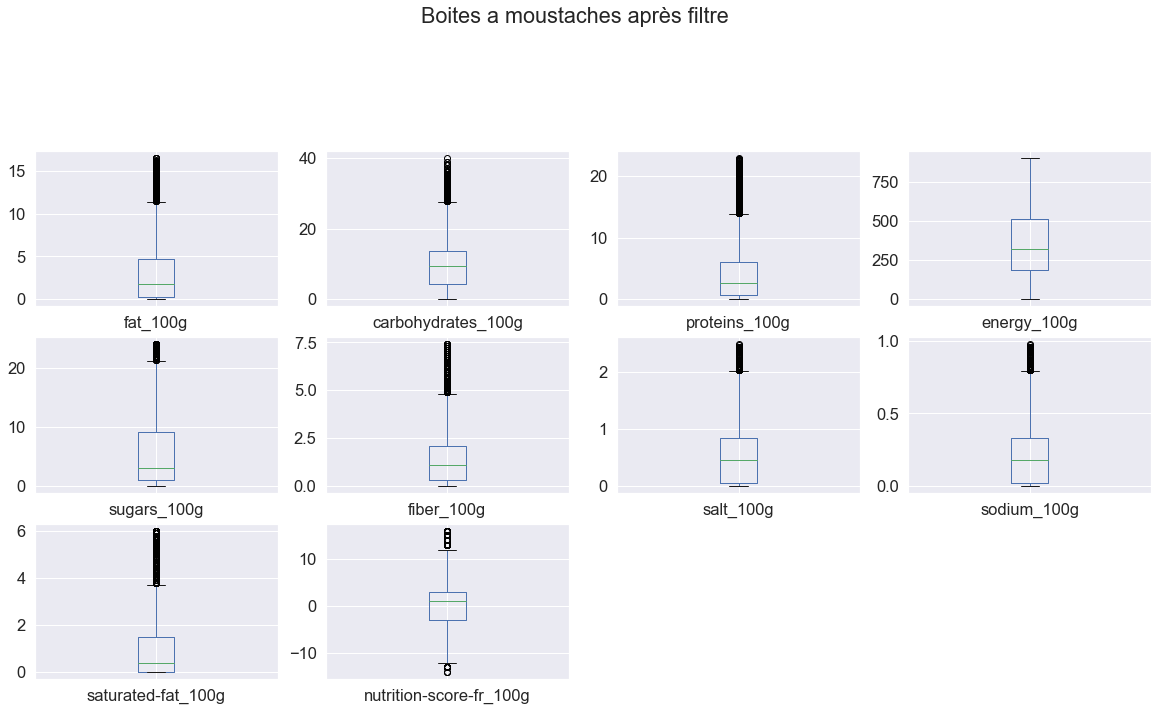

In [20]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Boites a moustaches après filtre', figsize=(20,20), layout=(6,4))

plt.show()


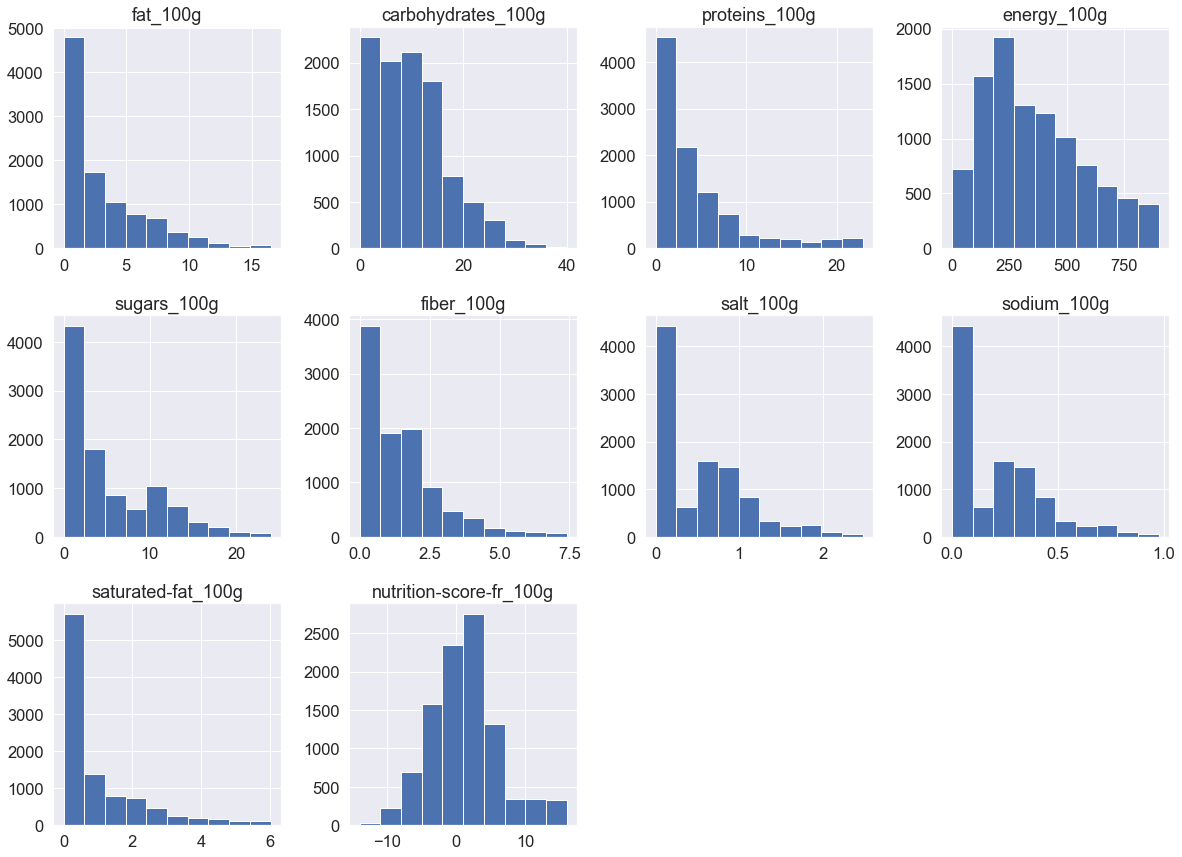

In [21]:
data.select_dtypes(include=float).hist(figsize=(20,20), layout=(4,4))
plt.title("Histogramme après filtre")
plt.show()

In [22]:
data.describe()

,fat_100g,carbohydrates_100g,proteins_100g,energy_100g,sugars_100g,fiber_100g,salt_100g,sodium_100g,saturated-fat_100g,nutrition-score-fr_100g
count,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000
mean,2.972574,9.863638,4.344819,361.019173,5.165427,1.433625,0.528040,0.207888,0.990318,0.722356
std,3.367600,7.009351,5.051069,219.888661,5.217832,1.398019,0.531405,0.209212,1.294813,5.032828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,0.200000,4.400000,0.700000,188.000000,1.000000,0.300000,0.050000,0.019685,0.010000,-3.000000
50%,1.800000,9.500000,2.700000,322.000000,3.000000,1.100000,0.450000,0.177165,0.400000,1.000000
75%,4.700000,13.700000,6.000000,510.000000,9.100000,2.100000,0.838200,0.330000,1.500000,3.000000
max,16.500000,40.000000,22.900000,900.000000,24.000000,7.400000,2.480000,0.976378,6.010000,16.000000


In [23]:
data.shape

(9948, 13)

#### Beaucoup de données ont été supprimées mais nous pouvons enfin analyser nos données

# Analyse statistique multivariée

#### Analysons toutes nos variables comparées au nombre de calories afin d'avoir une idée de la distribution de nos données

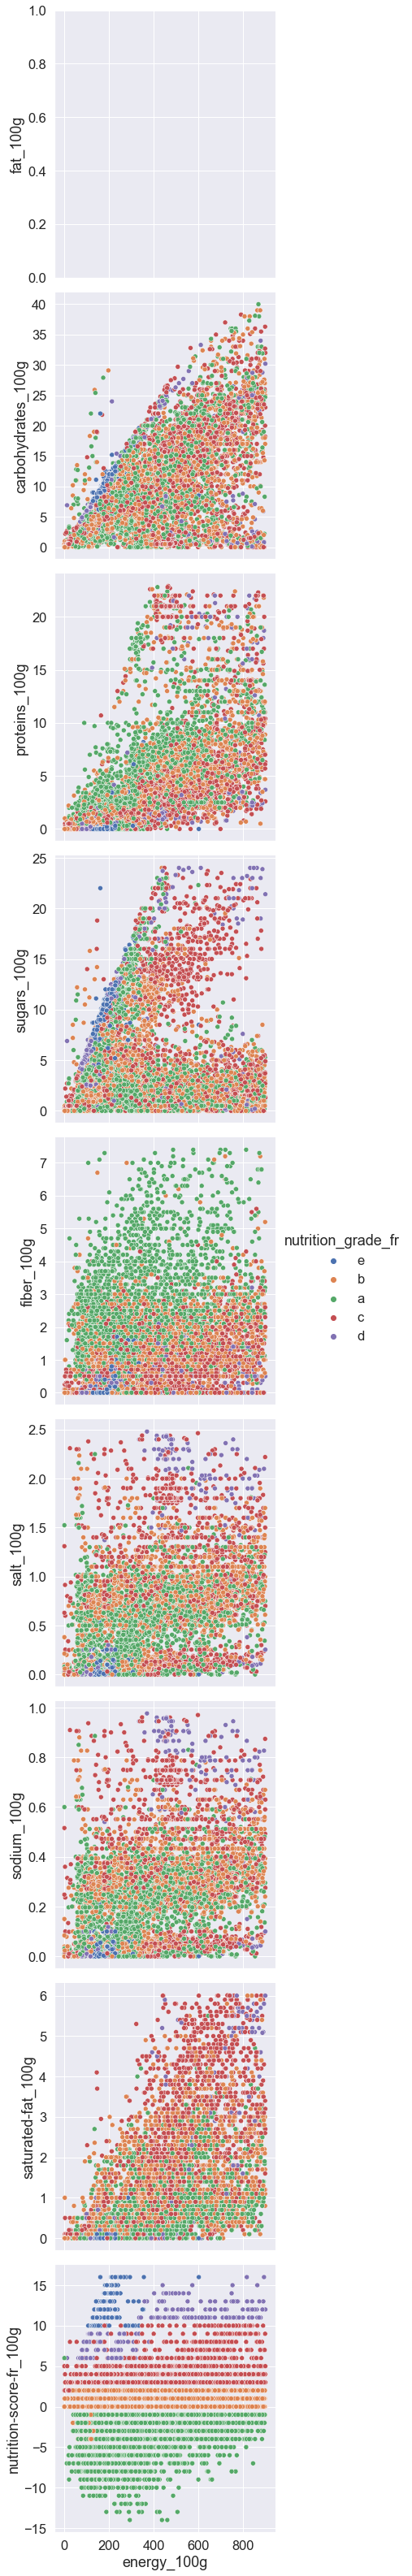

In [24]:
sns.pairplot(data, height=5, hue='nutrition_grade_fr',
            x_vars=['energy_100g'],
            y_vars= ['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g', 
                     'salt_100g', 'sodium_100g','saturated-fat_100g','nutrition-score-fr_100g'])

plt.show()


#### On aperçoit que le nutriscore et le nutrigrade semble très fortement corrélées (les données sont en paquets) et que sodium et salt le sont également (la répartition est la même.)
#### Analysons cela plus en détails

## PCA

In [25]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
standard_data = data.select_dtypes(include=float).transform(lambda x: (x - x.mean()) / x.std())

In [27]:
data_num = data.select_dtypes(float)

In [28]:
X = data_num.iloc[:]

In [29]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X) 

In [30]:
pca = PCA(n_components=3)

In [31]:
data_num_transform = StandardScaler().fit_transform(data_num)

In [32]:
pca.fit(X)
new_data = pca.transform(data_num_transform)
var_exp = pca.explained_variance_ratio_

In [33]:
sortie= pca.fit_transform(X)

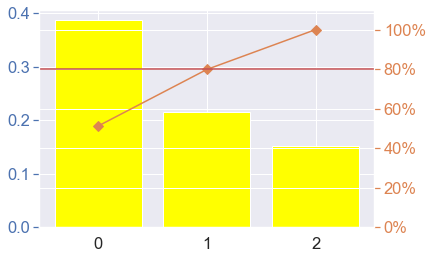

In [34]:
def pareto(data) :
    from matplotlib.ticker import PercentFormatter
    import numpy as np
    y = list(data)
    x = range(len(data))
    ycum = np.cumsum(y)/sum(y)*100
    fig, ax = plt.subplots()
    ax.bar(x,y,color="yellow")
    ax2 = ax.twinx()
    ax2.plot(x,ycum, color="C1", marker="D", ms=7)
    ax2.axhline(y=80,color="r")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.ylim(0,110)
    plt.show()

pareto(pca.explained_variance_ratio_)


In [35]:
from scipy.spatial import ConvexHull
import matplotlib as mpl
import matplotlib.cm as cm

def biplot(x=None,y=None,score=None,coeff=None,coeff_labels=None,score_labels=None,circle='T',bigdata=1000,cat=None,cmap="Set1",density=True):
    if score is not None : x = score
    if x.shape[1]>1 :
        xs = x[:,0]
        ys = x[:,1]
    else :
        xs = x
        ys = y
    if (len(xs) != len(ys)) : print("Warning ! x et y n'ont pas la même taille !")
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #x_c = xs * scalex
    #y_c = ys * scaley
    temp = (xs - xs.min())
    x_c = temp / temp.max() * 2 - 1
    temp = (ys - ys.min())
    y_c = temp / temp.max() * 2 - 1
    if cat is None : cat = [0]*len(xs)
    elif len(pd.Series(cat)) == 1 : cat = list(pd.Series(cat))*len(xs)
    elif len(pd.Series(cat)) != len(xs) : print("Warning ! Nombre anormal de catégories !")
    cat = pd.Series(cat).astype("category")
    fig = plt.figure(figsize=(6,6),facecolor='w') 
    ax = fig.add_subplot(111)
    # Affichage des points
    if (len(xs) < bigdata) :   
        ax.scatter(x_c,y_c, c = cat.cat.codes,cmap=cmap)
        if density==True : print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")
    # Affichage des nappes convexes 
    else :
        #color
        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes)))) #-(len(np.unique(c)))
        cmap = cmap
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        if density==True :
            sns.set_style("white")
            sns.kdeplot(x_c,y_c)
            sns.kdeplot(x_c,y_c, cmap="Blues", shade=True, shade_lowest=True, )
        #print(x_c)
        #print(y_c)
        for cat_temp in cat.cat.codes.unique() :
            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]
            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]
            points = [ [ None ] * len(x_c_temp) ] * 2
            points = np.array(points)
            points = points.reshape(len(x_c_temp),2)
            points[:,0] = x_c_temp
            points[:,1] = y_c_temp
            hull = ConvexHull(points)
            temp = 0
            for simplex in hull.simplices:
                color_temp = m.to_rgba(cat_temp)
                plt.plot(points[simplex, 0], points[simplex, 1],color=color_temp)#, linestyle='dashed')#linewidth=2,color=cat)
                if (temp == 0) :
                     plt.xlim(-1,1)
                     plt.ylim(-1,1)
                     temp = temp+1
    if coeff is not None :
        if (circle == 'T') :
            x_circle = np.linspace(-1, 1, 100)
            y_circle = np.linspace(-1, 1, 100)
            X, Y = np.meshgrid(x_circle,y_circle)
            F = X**2 + Y**2 - 1.0
            #fig, ax = plt.subplots()
            plt.contour(X,Y,F,[0])
        n = coeff.shape[0]
        for i in range(n):
            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,
                      head_width=0.05, head_length=0.05)
            if coeff_labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff_labels[i], color = 'g', ha = 'center', va = 'center')
        if score_labels is not None :
            for i in range(len(score_labels)) :
                temp_x = xs[i] * scalex
                temp_y = ys[i] * scaley
                plt.text(temp_x,temp_y,list(score_labels)[i])
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(linestyle='--')


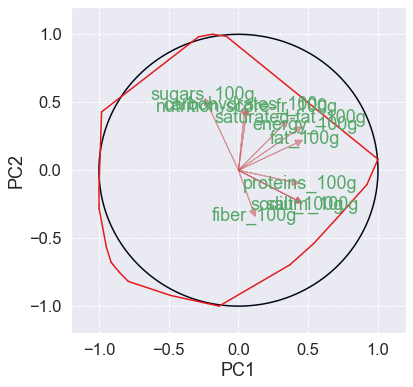

In [36]:
biplot(score=sortie[:,:],
    coeff=np.transpose(pca.components_[:, :]),coeff_labels = list(data_num.columns),density=False)
plt.show()

#### Effectuons un zoom pour y voir plus clair.

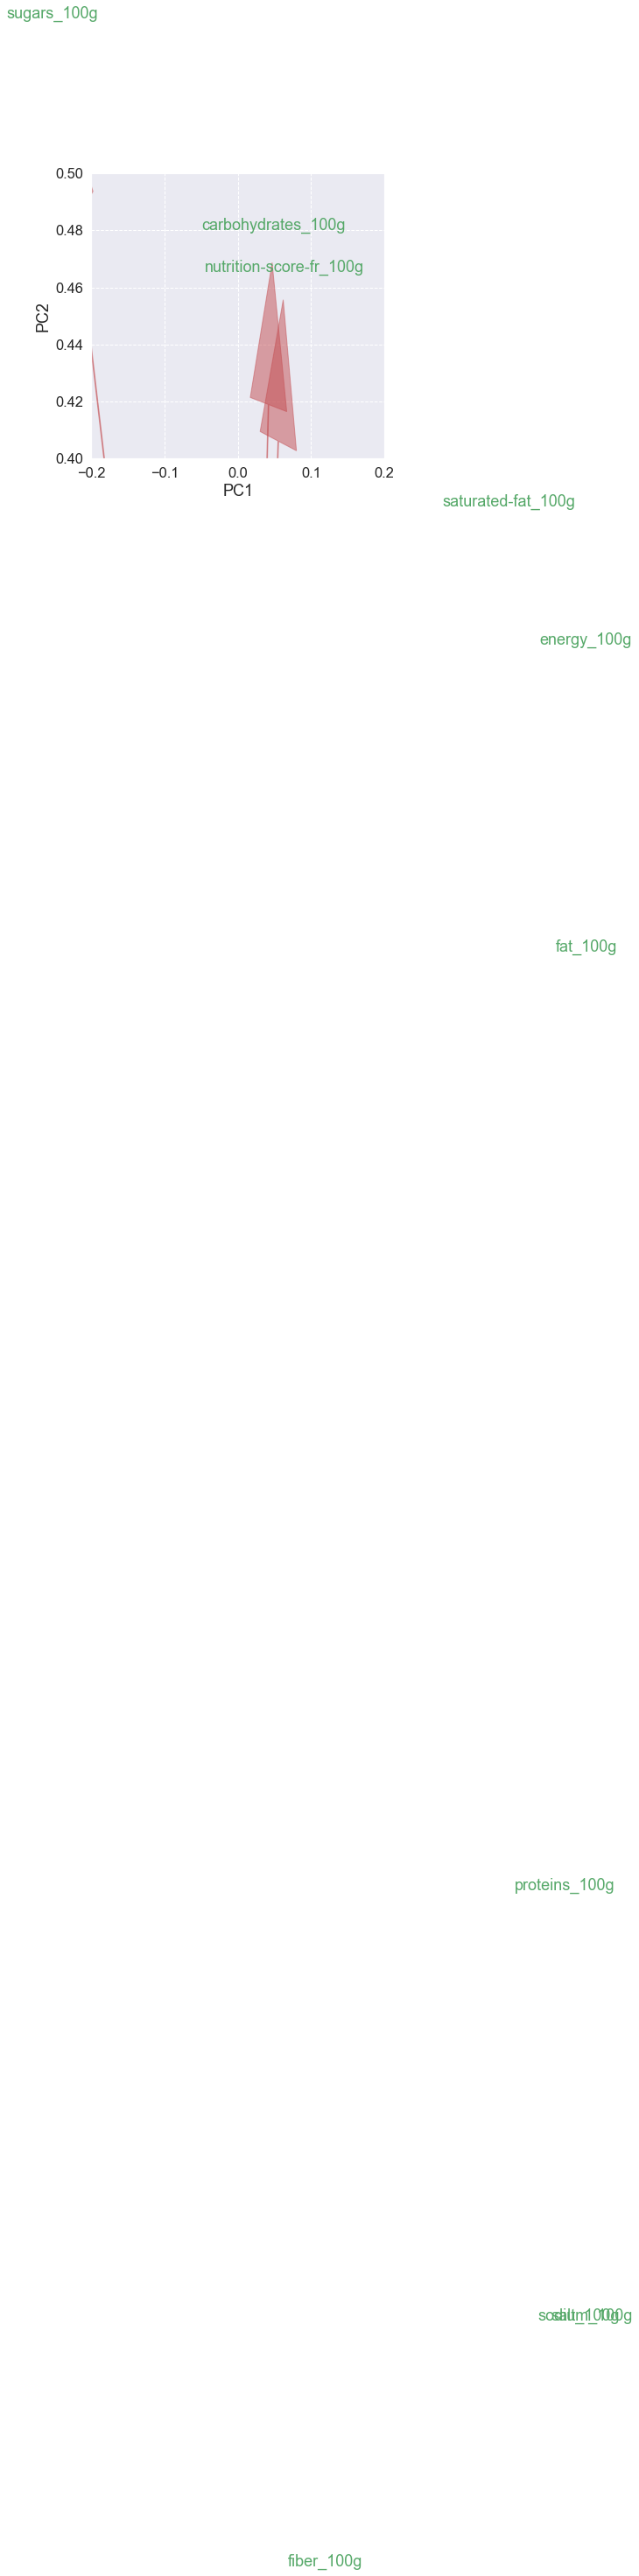

In [37]:
biplot(score=sortie[:,:],
    coeff=np.transpose(pca.components_[:, :]),coeff_labels = list(data_num.columns),density=False)
plt.xlim(-0.2, 0.2)
plt.ylim(0.4,0.5)
plt.show()

#### On ce rend compte que sodium et sel sont entiérement corrélés. on supprime donc la colonne sodium. 

In [38]:
data.drop(["sodium_100g"], axis = 1, inplace =True) 

# ANOVA

### On cherche a confirmer l'hypothèse faite précédemment sur le fait que  "nutrition-score-fr_100g" et nutrition_grade_100g" sont corrélés.

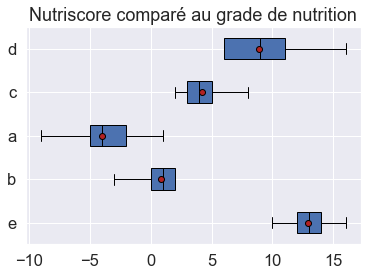

In [39]:
modalites = data["nutrition_grade_fr"].unique()
groupes = []
for m in modalites:
    groupes.append(data[data["nutrition_grade_fr"]==m]["nutrition-score-fr_100g"])
 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Nutriscore comparé au grade de nutrition')
plt.show()

In [40]:
X = "nutrition_grade_fr" # qualitative
Y = "nutrition-score-fr_100g" # quantitative

sous_chantillon = data["nutrition-score-fr_100g"]
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data["nutrition_grade_fr"],data["nutrition-score-fr_100g"])

0.8453393449205105

#### le résultat étant de 0.85, cela confirme bien l'hypothèse qu'on avait fait précédemment.  
#### On peut donc ne pas utiliser cette colonne pour la synthèse qui suivra dans le dashboard. 

In [41]:
data.drop(["nutrition-score-fr_100g"], axis = 1, inplace =True) 

#### On enregistre le dataset filtré dans un nouveau fichier excel qui sera utilisé pour le dashboard (le dashboard ce lance en utilisant les librairies voila et  jupyter flex en tapant  "voila --template=flex P3_02_pageweb.ipynb" a l'emplacement du notebook dans l'invite de commande)

In [42]:
data.to_csv("Dataframe_filtre.csv", sep='\t', encoding='utf-8')
